# Assignment 1: How much does your car cost?

## Data

The retail price of 2005 General Motors cars can be found in `car_data.csv`.

**Data Descriptions**:

||Features|Descriptions
|-|-|-|
|1| Price   | suggested retail price of the used 2005 GM car in excellent condition|
|2| Mileage | number of miles the car has been driven|
|3| Make    | manufacturer of the car such as Saturn, Pontiac, and Chevrolet|
|4| Model   | specific models for each car manufacturer such as Ion, Vibe, Cavalier|
|5| Trim (of car)| specific type of car model such as SE Sedan 4D, Quad Coupe 2D |         
|6| Type    | body type such as sedan, coupe, etc |
|7| Cylinder| number of cylinders in the engine    |    
|8| Liter   | a more specific measure of engine size|     
|9| Doors   | number of doors           |
|10| Cruise | indicator variable representing whether the car has cruise control (1 = cruise)|
|11| Sound  | indicator variable representing whether the car has upgraded speakers (1 = upgraded)|
|12| Leather| indicator variable representing whether the car has leather seats (1 = leather)|

#### 1 Import necessary libraries

In [9]:
# Libraries to load data
import pandas as pd
import numpy as np
# Libraries to visualize
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries to create and evaluate models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### 2. Load the data from csv file to `pandas` dataframe

In [10]:
df=pd.read_csv('car_data.csv')

#### 3. Inspect the first 5 rows of the dataframe

In [11]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#### 4. Check the number of rows and columns

In [12]:
df.shape

(804, 12)

#### 5. Get some information about the dataset via `.info()`

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


#### 6. Check number of missing values per columns

In [9]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

#### 7. Get table of distributions each features and visualize this distribution.

In [67]:
df.Price.describe()

count      804.000000
mean     21343.143767
std       9884.852801
min       8638.930895
25%      14273.073870
50%      18024.995019
75%      26717.316636
max      70755.466717
Name: Price, dtype: float64

c:\users\hien\downloads\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

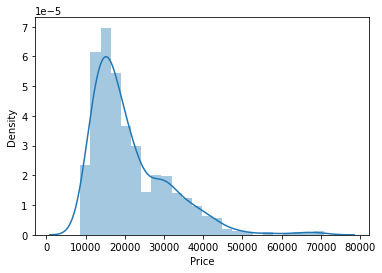

In [12]:
sns.distplot(df['Price'])

##### Nhận xét: Giá trị bị lệch phải

c:\users\hien\downloads\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


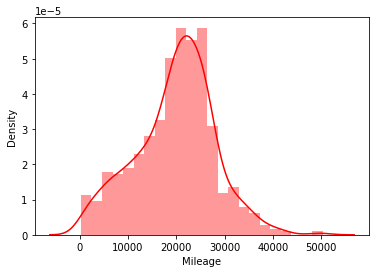

c:\users\hien\downloads\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


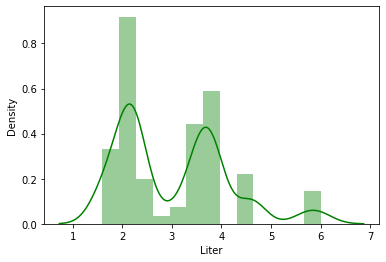

c:\users\hien\downloads\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


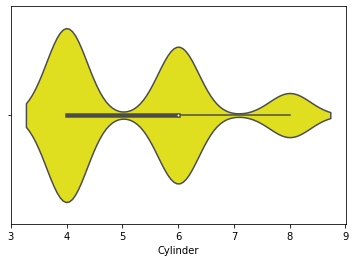

In [51]:
sns.distplot(df['Mileage'], color='red')
plt.show()

sns.distplot(df['Liter'], color='green')
plt.show()

sns.violinplot(df['Cylinder'], color='yellow')
plt.show()

#### 8. Visualize correlation coefficient between features and label.

<AxesSubplot:>

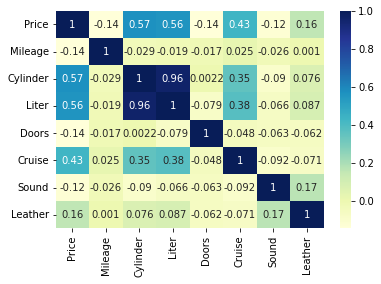

In [14]:
sns.heatmap(df.corr(),annot=True,  cmap="YlGnBu")

<AxesSubplot:>

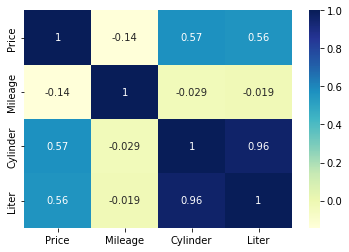

In [15]:
sns.heatmap(df.drop(columns=['Doors','Cruise','Sound','Leather']).corr(), annot=True,  cmap="YlGnBu")

### Có thể xảy ra đa cộng tuyến giữa biến 'Cylinder' và 'Liter' vì có mối tương quan mạnh (|r| = 0.96 > 0.5)

### **Chú thích**

![](https://scontent.xx.fbcdn.net/v/t1.15752-9/s526x296/270485465_1306534069824356_7621899320973303627_n.png?_nc_cat=103&ccb=1-5&_nc_sid=aee45a&_nc_ohc=X7-HVD6k1EEAX9zhKPU&_nc_ad=z-m&_nc_cid=0&_nc_ht=scontent.xx&oh=03_AVKzTp38M610h0jZwK6g7lm9lLOllEXvTvitL-Z7B3DHWw&oe=61FB868E)

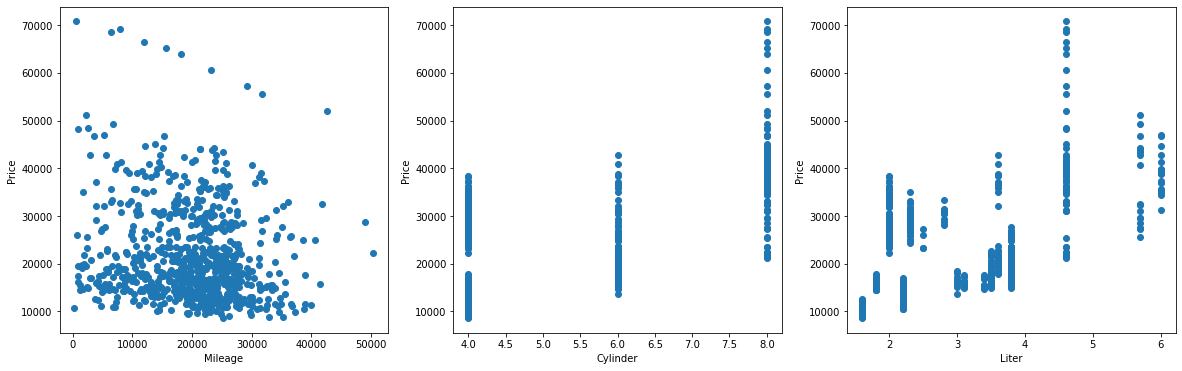

In [60]:
fig, ax = plt.subplots (1,3, figsize=(20,6))
ax[0].scatter(df.Mileage, df.Price)
ax[0].set(xlabel='Mileage', ylabel='Price')

ax[1].scatter(df.Cylinder, df.Price)
ax[1].set(xlabel='Cylinder', ylabel='Price')

ax[2].scatter(df.Liter, df.Price)
ax[2].set(xlabel='Liter', ylabel='Price')

plt.show()

#### 9. Split the dataset into train and test set with ratio 90:10 with random seeds of 42.

In [260]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='Price'), df.Price, test_size=0.1,random_state=42)

In [261]:
X_train.shape, y_train.shape

((723, 11), (723,))

In [262]:
X_test.shape,y_test.shape

((81, 11), (81,))

In [263]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Pontiac'

### **Nhận xét**: Bị lỗi, không thể convert biến
### Vậy nên dùng biến giả

In [270]:
dummies = pd.get_dummies(df)

In [271]:
X_train,X_test,y_train,y_test = train_test_split(dummies.drop(columns='Price'), dummies.Price, test_size=0.1,random_state=42)

In [272]:
X_train.shape, y_train.shape

((723, 97), (723,))

In [273]:
X_test.shape,y_test.shape

((81, 97), (81,))

#### 10. Find the best combination of factors to predict price with linear regression classifier.

E.g:
- Use mileage to find the linear regression equation.
- Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [277]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [278]:
prediction = model.predict(X_test)

In [279]:
pd.DataFrame({'prediction':prediction,
              'groundtruth':y_test})

,prediction,groundtruth
192,11997.079076,11302.902985
717,29424.242745,29114.544506
168,9431.587314,10777.052537
522,20843.914426,20677.593819
536,15008.469832,15253.868566
...,...,...
596,11751.326374,12465.508523
752,14370.120995,13991.040057
327,14115.125613,14191.882277
758,13675.104088,13811.155022


#### 11. Evaluate your model performance using R-squared Error.

In [280]:
r2_score(y_test, prediction)

0.9925054468942706

#### 12. Visualize the actual prices and predicted prices of the test set.